# Khaled Hamza

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_csv('/content/Iris.csv')
data

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [ ]:
data['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [ ]:
data.Species.replace({'Iris-setosa':1,
                      'Iris-virginica':2 , 
                      'Iris-versicolor':3},inplace = True)

In [ ]:
data = data.drop('Id' ,axis = 1)

In [ ]:
data

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


# K-Means Algorithm

In [ ]:
from sklearn.cluster import KMeans
from sklearn.cluster import MiniBatchKMeans

In [ ]:
num_clusters = []
for i in range(1,10):
  km = KMeans(n_clusters = i).fit(data)
  num_clusters.append(km.inertia_)

In [ ]:
num_clusters

[780.8244,
 180.03640000000001,
 87.31002785114046,
 66.97905140650855,
 50.36703756613757,
 42.89150547286418,
 35.51944766505636,
 31.263211936614113,
 28.929078027235924]

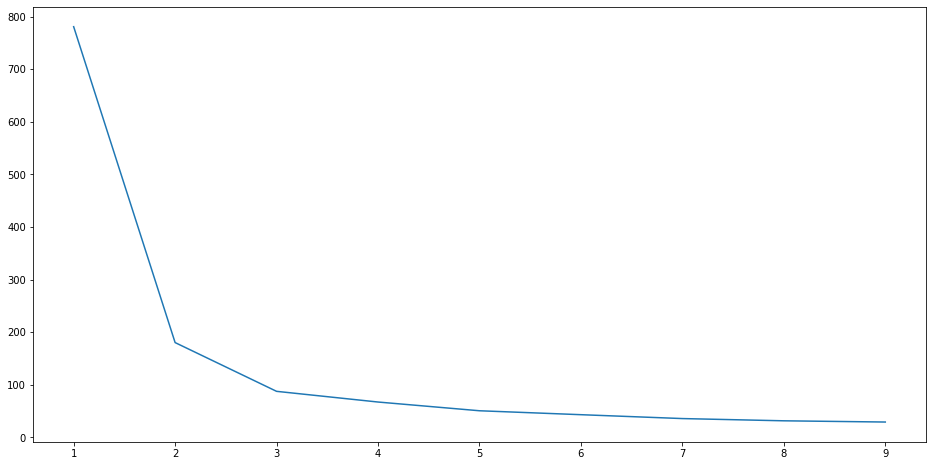

In [ ]:
plt.figure(figsize=(16,8))
sns.lineplot(x=np.arange(1,10),y=num_clusters)

This technique is called elbow method and it's used to find the optimal number of clusters which is 3

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


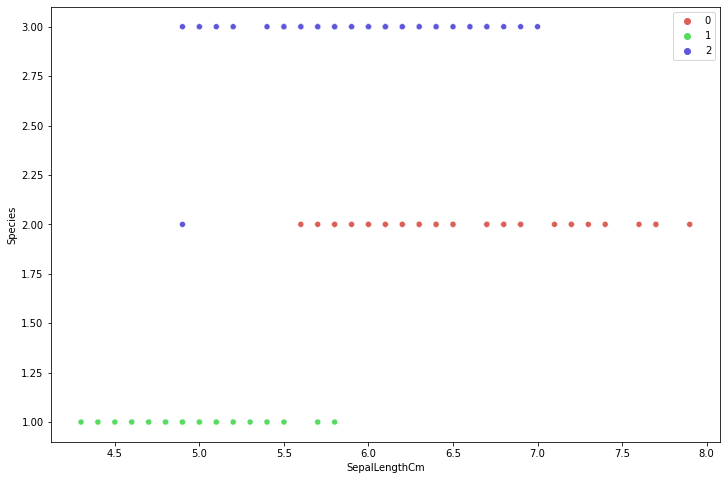

In [ ]:
km3 = KMeans(n_clusters=3).fit(data)
plt.figure(figsize=(12,8))
sns.scatterplot(data['SepalLengthCm'],data['Species'],hue=km3.labels_,palette=sns.color_palette('hls', 3))

In [ ]:
km3.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


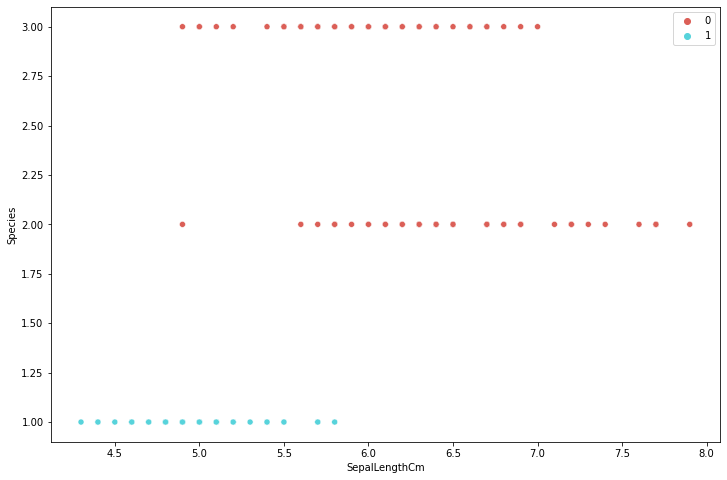

In [ ]:
km3 = KMeans(n_clusters=2).fit(data)
plt.figure(figsize=(12,8))
sns.scatterplot(data['SepalLengthCm'],data['Species'],hue=km3.labels_,palette=sns.color_palette('hls', 2))

**So the optimum number of clusters is 3**

# Mini-Batch Algorithm

In [ ]:
mbk = MiniBatchKMeans(n_clusters=3).fit(data)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


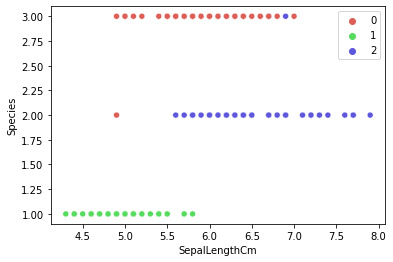

In [ ]:
sns.scatterplot(data['SepalLengthCm'] , data['Species'] , hue = mbk.labels_ ,palette=sns.color_palette('hls', 3))